Scripts for regression experiments on mouse

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm

import mp_run
import matplotlib.pyplot as plt


%load_ext autoreload
%autoreload 2
from multiprocessing import Pool, cpu_count


# regex for number extraction from string
number_pattern =  r'(-?(?:0|[1-9]\d*)(?:\.\d+)?(?:[eE][+-]?\d+)?)'
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


In [2]:
ref_res_df = pd.read_csv('../output/network_model/yeast_all_tf_high_var_target_efron_train.csv.gz', compression='gzip', index_col=0)

In [3]:
train_source_df_1 = pd.read_csv('../data/yeast/GSE145936/normalized/train_source.csv.gz', compression='gzip', index_col=0)
train_target_df_1 = pd.read_csv('../data/yeast/GSE145936/normalized/train_target.csv.gz', compression='gzip', index_col=0)
test_source_df_1 = pd.read_csv('../data/yeast/GSE145936/normalized/test_source.csv.gz', compression='gzip', index_col=0)
test_target_df_1 = pd.read_csv('../data/yeast/GSE145936/normalized/test_target.csv.gz', compression='gzip', index_col=0)

train_source_df_2 = pd.read_csv('../data/yeast/GSE153609/normalized/train_source.csv.gz', compression='gzip', index_col=0)
train_target_df_2 = pd.read_csv('../data/yeast/GSE153609/normalized/train_target.csv.gz', compression='gzip', index_col=0)
test_source_df_2 = pd.read_csv('../data/yeast/GSE153609/normalized/test_source.csv.gz', compression='gzip', index_col=0)
test_target_df_2 = pd.read_csv('../data/yeast/GSE153609/normalized/test_target.csv.gz', compression='gzip', index_col=0)

train_source_df_3 = pd.read_csv('../data/yeast/GSE168699/normalized/train_source.csv.gz', compression='gzip', index_col=0)
train_target_df_3 = pd.read_csv('../data/yeast/GSE168699/normalized/train_target.csv.gz', compression='gzip', index_col=0)
test_source_df_3 = pd.read_csv('../data/yeast/GSE168699/normalized/test_source.csv.gz', compression='gzip', index_col=0)
test_target_df_3 = pd.read_csv('../data/yeast/GSE168699/normalized/test_target.csv.gz', compression='gzip', index_col=0)

In [4]:
train_source_4_1 = pd.read_csv('../data/yeast/GSE226769/normalized/train_source_1.csv.gz', compression='gzip', index_col=0)
train_target_4_1 = pd.read_csv('../data/yeast/GSE226769/normalized/train_target_1.csv.gz', compression='gzip', index_col=0)
test_source_4_1 = pd.read_csv('../data/yeast/GSE226769/normalized/test_source_1.csv.gz', compression='gzip', index_col=0)
test_target_4_1 = pd.read_csv('../data/yeast/GSE226769/normalized/test_target_1.csv.gz', compression='gzip', index_col=0)

train_source_4_2 = pd.read_csv('../data/yeast/GSE226769/normalized/train_source_2.csv.gz', compression='gzip', index_col=0)
train_target_4_2 = pd.read_csv('../data/yeast/GSE226769/normalized/train_target_2.csv.gz', compression='gzip', index_col=0)
test_source_4_2 = pd.read_csv('../data/yeast/GSE226769/normalized/test_source_2.csv.gz', compression='gzip', index_col=0)
test_target_4_2 = pd.read_csv('../data/yeast/GSE226769/normalized/test_target_2.csv.gz', compression='gzip', index_col=0)

train_source_4_3 = pd.read_csv('../data/yeast/GSE226769/normalized/train_source_3.csv.gz', compression='gzip', index_col=0)
train_target_4_3 = pd.read_csv('../data/yeast/GSE226769/normalized/train_target_3.csv.gz', compression='gzip', index_col=0)
test_source_4_3 = pd.read_csv('../data/yeast/GSE226769/normalized/test_source_3.csv.gz', compression='gzip', index_col=0)
test_target_4_3 = pd.read_csv('../data/yeast/GSE226769/normalized/test_target_3.csv.gz', compression='gzip', index_col=0)

train_source_4_4 = pd.read_csv('../data/yeast/GSE226769/normalized/train_source_4.csv.gz', compression='gzip', index_col=0)
train_target_4_4 = pd.read_csv('../data/yeast/GSE226769/normalized/train_target_4.csv.gz', compression='gzip', index_col=0)
test_source_4_4 = pd.read_csv('../data/yeast/GSE226769/normalized/test_source_4.csv.gz', compression='gzip', index_col=0)
test_target_4_4 = pd.read_csv('../data/yeast/GSE226769/normalized/test_target_4.csv.gz', compression='gzip', index_col=0)

train_source_df_4 = pd.concat([train_source_4_1, train_source_4_2, train_source_4_3, train_source_4_4], axis=1)
train_target_df_4 = pd.concat([train_target_4_1, train_target_4_2, train_target_4_3, train_target_4_4], axis=1)
test_source_df_4 = pd.concat([test_source_4_1, test_source_4_2, test_source_4_3, test_source_4_4], axis=1)
test_target_df_4 = pd.concat([test_target_4_1, test_target_4_2, test_target_4_3, test_target_4_4], axis=1)


In [5]:
train_source = pd.concat([train_source_df_1, train_source_df_2, train_source_df_3, train_source_4_1, train_source_4_2, train_source_4_3, train_source_4_4], axis=1)
train_target = pd.concat([train_target_df_1, train_target_df_2, train_target_df_3, train_target_4_1, train_target_4_2, train_target_4_3, train_target_4_4], axis=1)
test_source = pd.concat([test_source_df_1, test_source_df_2, test_source_df_3, test_source_4_1, test_source_4_2, test_source_4_3, test_source_4_4], axis=1)
test_target = pd.concat([test_target_df_1, test_target_df_2, test_target_df_3, test_target_4_1, test_target_4_2, test_target_4_3, test_target_4_4], axis=1)

common_genes = list(train_source.index)

In [6]:
train_source_list = [train_source_df_1, train_source_df_2, train_source_df_3, train_source_df_4]
train_target_list = [train_target_df_1, train_target_df_2, train_target_df_3, train_target_df_4]
test_source_list = [test_source_df_1, test_source_df_2, test_source_df_3, test_source_df_4]
test_target_list = [test_target_df_1, test_target_df_2, test_target_df_3, test_target_df_4]

alt_train_source_list = [train_source_4_1, train_source_4_2, train_source_4_3, train_source_4_4]
alt_train_target_list = [train_target_4_1, train_target_4_2, train_target_4_3, train_target_4_4]
alt_test_source_list = [test_source_4_1, test_source_4_2, test_source_4_3, test_source_4_4]
alt_test_target_list = [test_target_4_1, test_target_4_2, test_target_4_3, test_target_4_4]

In [7]:
# get network data, training features
tf_set = set()
tf_list_df = pd.read_csv('../data/yeast/yeast_tf_list.tsv.gz', sep='\t', compression='gzip', index_col=0)
for name in tf_list_df['Gene Names']:
    name_splits = name.split(' ')
    for i in name_splits:
        if i.upper() in train_source.index:
            tf_set.add(i.upper())

network_df = pd.read_csv('../data/yeast/yeat_network.csv', index_col=0)
target_gene_list = []
for i, row in network_df.iterrows():
    tf_list = row.tf_list
    if pd.isnull(tf_list): 
        continue
    tf_list = tf_list.split('; ')
    tf_set = tf_set.union(set(tf_list))
    target_gene_list.append(i)


In [8]:

target_exp = pd.concat([train_target, test_target], axis=1)
source_exp = pd.concat([train_source, test_source], axis=1)
# target_gene_list = list(ref_res_df.index)
tf_list_df = pd.read_csv('../output/network_model/yeast_tf.csv', names=['tf'], index_col=0)
tf_list = list(tf_list_df.index)

X = source_exp.loc[tf_list]


In [9]:
res_df = pd.read_csv('../output/network_model/yeast_full_results.csv.gz', index_col=0, compression='gzip')
rmse_list = [res_df['rf_rmse'].mean()]
error_list = [res_df['rf_rmse'].sem()]

In [10]:
all_rmse_list = []
all_train_rmse_list = []
all_train_source = pd.concat(train_source_list, axis=1)
all_train_target = pd.concat(train_target_list, axis=1)

for i in range(len(train_source_list)):
    cv_test_source = test_source_list[i]
    cv_test_target = test_target_list[i]
    cv_train_source = train_source_list[i]
    cv_train_target = train_target_list[i]
    new_test_target = cv_test_target
    new_test_target = new_test_target.loc[new_test_target.std(axis=1) > 0.5]
    new_target_gene_list = new_test_target.index
    mp_calc = mp_run.MpCalc(new_target_gene_list, X, network_df, cv_train_source.loc[tf_list], cv_train_target, cv_test_source.loc[tf_list], cv_test_target)
    iter_length = len(new_target_gene_list)
    if (iter_length < 1): continue
    with Pool(cpu_count()) as p:
        r = list(tqdm(p.imap(mp_calc.full_comp_new, range(iter_length)), total=iter_length))
    r = np.array(r)
    out_df = pd.DataFrame(index=new_target_gene_list)
    out_df['rf_rmse'] = r[:, 6]
    rmse_list.append(out_df['rf_rmse'].mean())
    error_list.append(out_df['rf_rmse'].sem())
    
    # all_rmse_list = np.concatenate([all_rmse_list, r[:, 6]])
    # print(out_df['rf_rmse'].mean())
    # print(out_df['rf_score'].mean())

    # mp_calc = mp_run.MpCalc(new_target_gene_list, X, network_df, all_train_source.loc[tf_list], all_train_target, cv_test_source.loc[tf_list], cv_test_target)
    # iter_length = len(new_target_gene_list)
    # with Pool(cpu_count()) as p:
    #     r = list(tqdm(p.imap(mp_calc.full_comp_new, range(iter_length)), total=iter_length))
    # r = np.array(r)
    # print(np.mean(r[:, 6]))
    # all_train_rmse_list = np.concatenate([all_train_rmse_list, r[:, 6]])


#     print('======================================')
# print(np.mean(all_rmse_list))
# print(np.mean(all_train_rmse_list))

  0%|          | 0/213 [00:00<?, ?it/s]

100%|██████████| 310/310 [00:48<00:00,  6.38it/s]


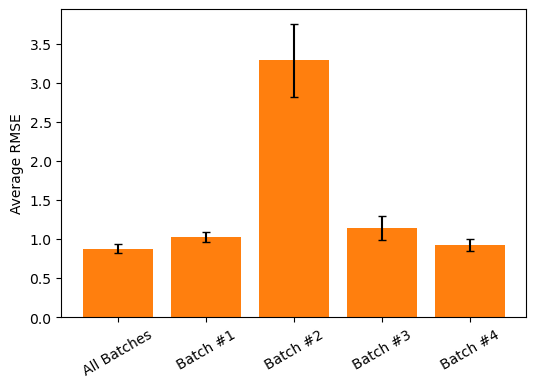

In [12]:

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)
ax.bar(['All Batches','Batch #1','Batch #2','Batch #3','Batch #4'], rmse_list, color=colors[1], yerr=error_list, capsize=3)
ax.set(ylabel='Average RMSE')
plt.xticks(rotation=30)
plt.savefig('./plot_output/batch_comp/yeast.pdf', bbox_inches='tight')